In [1]:
import QPIXL.helper as hlp
from QPIXL.qiskit.qpixl_parallel import cFRQI, cFRQI_old
from qiskit_aer import StatevectorSimulator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

backend = StatevectorSimulator(method="statevector")

# Using the original cFRQI and padding the images to an equal size

ALL IMAGES WILL BE PADDED TO 4096
SIZE OF QC: 16396


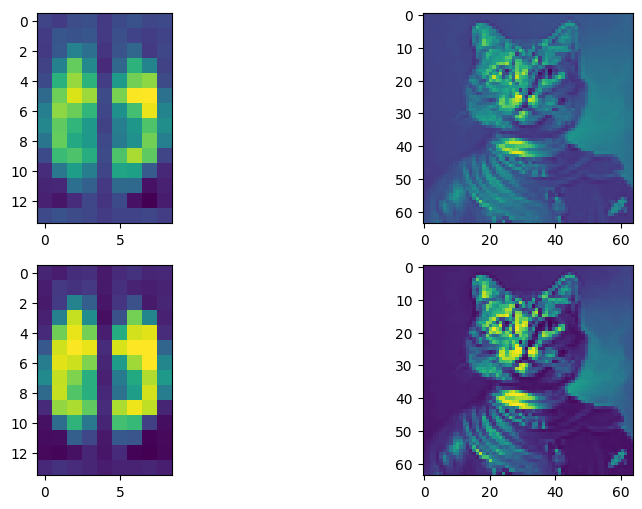

In [2]:
img = Image.open("figures/creation_world.png")
img = img.convert("L")
img = np.array(
    img.resize((9,14), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
)

img2 = Image.open("figures/cat.webp")
img2 = img2.convert("L")
img2 = np.array(
    img2.resize((64, 64), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
    )

shapes = np.array([
    img.shape,
    img2.shape
])

# Determine the max padding size
max_pad_size = hlp.nextpow2(np.max(shapes[:,0] * shapes[:, 1]))
print(f"ALL IMAGES WILL BE PADDED TO {max_pad_size}")

# Plot images for reference
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0][0].imshow(img)
axs[0][1].imshow(img2)

# Transpose images and pad them
padded_img = hlp.pad_0(img.T, size_pow2=max_pad_size)
padded_img2 = hlp.pad_0(img2.T, size_pow2=max_pad_size)

# Use padded images to build and run the circuit
np_frame = [padded_img, padded_img2]
decoded_data = []
qc = cFRQI_old(np_frame, 0)
job = backend.run(qc)

# Decode images without padding
sv = np.real(job.result().get_statevector())
decoded = hlp.decodeParallelQPIXL(sv, qc, len(np_frame))
for datum, shape in zip(decoded, shapes):
    decoded_data.append(hlp.reconstruct_img(datum, shape))

# Plot resulting images for comparison
axs[1][0].imshow(decoded_data[0])
axs[1][1].imshow(decoded_data[1])

print(f"SIZE OF QC: {qc.size()}")

# Using the updated cFRQI and padding all images to the same size

ALL IMAGES WILL BE PADDED TO 4096
SIZE OF QC: 16396


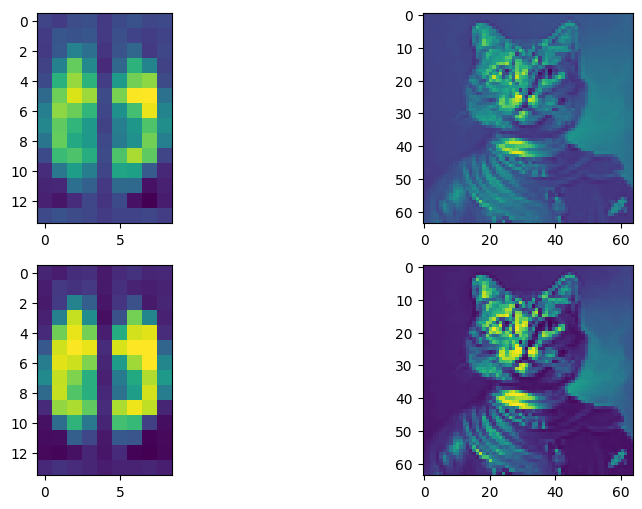

In [3]:
img = Image.open("figures/creation_world.png")
img = img.convert("L")
img = np.array(
    img.resize((9,14), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
)

img2 = Image.open("figures/cat.webp")
img2 = img2.convert("L")
img2 = np.array(
    img2.resize((64, 64), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
    )

shapes = np.array([
    img.shape,
    img2.shape
])

# Determine the max padding size
max_pad_size = hlp.nextpow2(np.max(shapes[:,0] * shapes[:, 1]))
print(f"ALL IMAGES WILL BE PADDED TO {max_pad_size}")

# Plot images for reference
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0][0].imshow(img)
axs[0][1].imshow(img2)

# Transpose images and pad them
padded_img = hlp.pad_0(img.T, size_pow2=max_pad_size)
padded_img2 = hlp.pad_0(img2.T, size_pow2=max_pad_size)

# Use padded images to build and run the circuit
np_frame = [padded_img, padded_img2]
decoded_data = []
qc = cFRQI(np_frame, 0)
job = backend.run(qc)

# Decode images without padding
sv = np.real(job.result().get_statevector())
decoded = hlp.decodeParallelQPIXL(sv, qc, len(np_frame))
for datum, shape in zip(decoded, shapes):
    decoded_data.append(hlp.reconstruct_img(datum, shape))

# Plot resulting images for comparison
axs[1][0].imshow(decoded_data[0])
axs[1][1].imshow(decoded_data[1])

print(f"SIZE OF QC: {qc.size()}")

# Using the updated cFRQI and padding the images to their respective nearest power of 2

SIZE OF QC: 12428


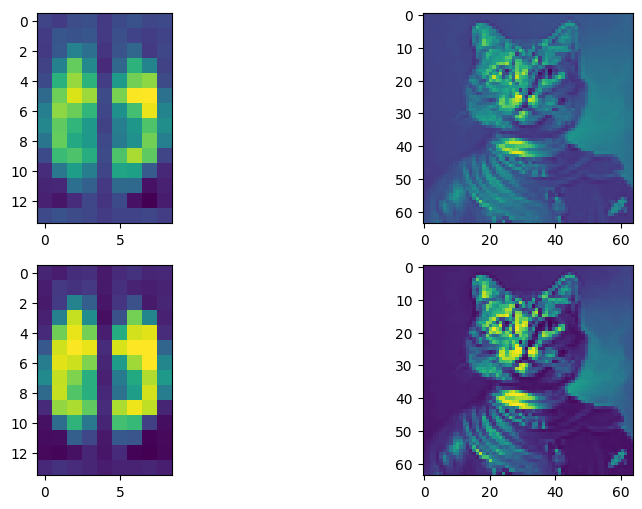

In [4]:
img = Image.open("figures/creation_world.png")
img = img.convert("L")
img = np.array(
    img.resize((9,14), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
)

img2 = Image.open("figures/cat.webp")
img2 = img2.convert("L")
img2 = np.array(
    img2.resize((64, 64), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
    )

shapes = np.array([
    img.shape,
    img2.shape
])


# Plot images for reference
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0][0].imshow(img)
axs[0][1].imshow(img2)

# Transpose images and pad them
padded_img = hlp.pad_0(img.T)
padded_img2 = hlp.pad_0(img2.T)

# Use padded images to build and run the circuit
np_frame = [padded_img, padded_img2]
decoded_data = []
qc = cFRQI(np_frame, 0)
job = backend.run(qc)

# Decode images without padding
sv = np.real(job.result().get_statevector())
decoded = hlp.decodeParallelQPIXL(sv, qc, len(np_frame))
for datum, shape in zip(decoded, shapes):
    decoded_data.append(hlp.reconstruct_img(datum, shape))

# Plot resulting images for comparison
axs[1][0].imshow(decoded_data[0])
axs[1][1].imshow(decoded_data[1])

print(f"SIZE OF QC: {qc.size()}")

# Producing the bug on the original cFRQI
This bug is noticeable by a corrupted decoded image
- it happens on certain input shapes of images, but affected images are in order (in this case, the shape of img2 affects img2)
- this can be further examined by changing the shape of img1, and they should all produce the same bug
- but only certain values of img2 produce this bug
- some of these values for img2 here are (27,27), (30, 49)

- by my examination, they occur because the parity check (pc) value gets miscalculated. 
- i've added a print statement that gets activated in these examples - the value of pc should be a power of 2 and it isn't

ALL IMAGES WILL BE PADDED TO 2048
POTENTIAL BUG HERE: This is the special case in which the PC var is calculated as: 1536
SIZE OF QC: 8200


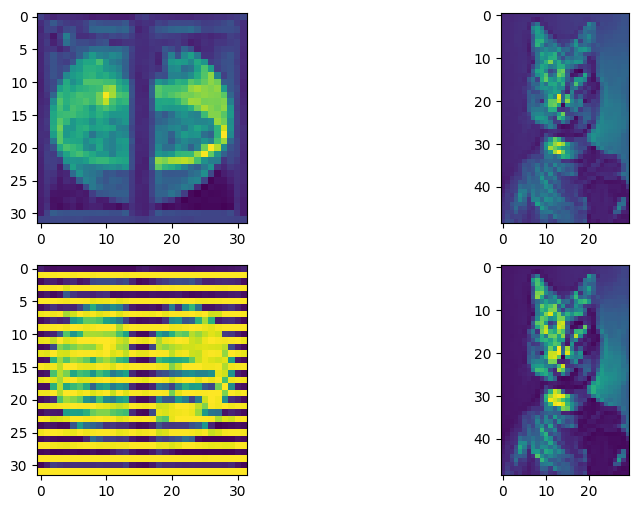

In [5]:
img = Image.open("figures/creation_world.png")
img = img.convert("L")
img = np.array(
    img.resize((32,32), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
)

img2 = Image.open("figures/cat.webp")
img2 = img2.convert("L")
img2 = np.array(
    img2.resize((30, 49), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
    )

shapes = np.array([
    img.shape,
    img2.shape
])

# Determine the max padding size
max_pad_size = hlp.nextpow2(np.max(shapes[:,0] * shapes[:, 1]))
print(f"ALL IMAGES WILL BE PADDED TO {max_pad_size}")

# Plot images for reference
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0][0].imshow(img)
axs[0][1].imshow(img2)

# Transpose images and pad them
padded_img = hlp.pad_0(img.T, size_pow2=max_pad_size)
padded_img2 = hlp.pad_0(img2.T, size_pow2=max_pad_size)

# Use padded images to build and run the circuit
np_frame = [padded_img, padded_img2]
decoded_data = []
qc = cFRQI_old(np_frame, 0)
job = backend.run(qc)

# Decode images without padding
sv = np.real(job.result().get_statevector())
decoded = hlp.decodeParallelQPIXL(sv, qc, len(np_frame))
for datum, shape in zip(decoded, shapes):
    decoded_data.append(hlp.reconstruct_img(datum, shape))

# Plot resulting images for comparison
axs[1][0].imshow(decoded_data[0])
axs[1][1].imshow(decoded_data[1])

print(f"SIZE OF QC: {qc.size()}")

# Showing that the same bug is fixed using the updated cFRQI, without padding images to the same size

SIZE OF QC: 7178


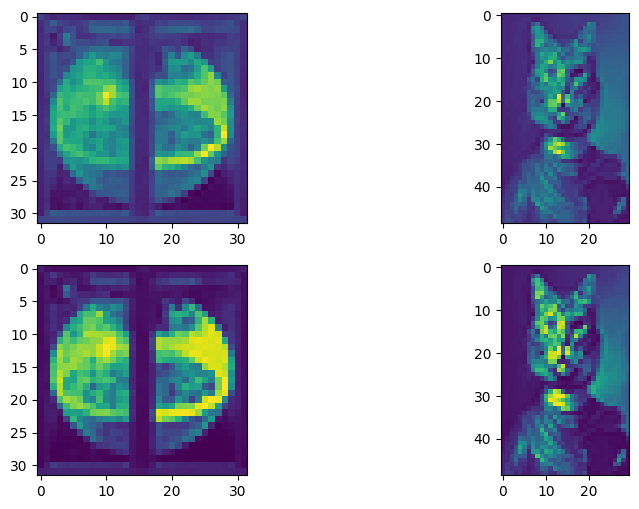

In [6]:
img = Image.open("figures/creation_world.png")
img = img.convert("L")
img = np.array(
    img.resize((32,32), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
)

img2 = Image.open("figures/cat.webp")
img2 = img2.convert("L")
img2 = np.array(
    img2.resize((30, 49), Image.Resampling.LANCZOS),
    dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
    )

shapes = np.array([
    img.shape,
    img2.shape
])


# Plot images for reference
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0][0].imshow(img)
axs[0][1].imshow(img2)

# Transpose images and pad them
padded_img = hlp.pad_0(img.T)
padded_img2 = hlp.pad_0(img2.T)

# Use padded images to build and run the circuit
np_frame = [padded_img, padded_img2]
decoded_data = []
qc = cFRQI(np_frame, 0)
job = backend.run(qc)

# Decode images without padding
sv = np.real(job.result().get_statevector())
decoded = hlp.decodeParallelQPIXL(sv, qc, len(np_frame))
for datum, shape in zip(decoded, shapes):
    decoded_data.append(hlp.reconstruct_img(datum, shape))

# Plot resulting images for comparison
axs[1][0].imshow(decoded_data[0])
axs[1][1].imshow(decoded_data[1])

print(f"SIZE OF QC: {qc.size()}")

# ⬇️ TESTS BELOW ⬇️
# Just to show that the methods of equal padding all input images, or using the updated cFRQI produce the same results - up to the point where the original cFRQI fails

### Every plot contains a sequence of randomly selected images from the "figures" folder.

### There are up to NUM_OF_TESTS number of plots. (Default=5)

### Every image is randomly scaled to have a width and height in the range of [MIN_VALID_IMG_DIM, MAX_VALID_IMG_DIM]. (Default=[5,64])

### There are up to MAX_NUM_IMAGES_AT_ONCE images in a single plot. (Default=5)

### In every plot, the first row displays the input images, the second row displays output images, the third row displays output images generated with the equal padding method.

Given that you don't re-run this cell before looking at it, the outputs should show a case of a chain of corrupted images generated by the old cFRQI, with equal-padded inputs, in the THIRD plot. This has been correctly preceded by the print statement placed in the old version of the cFRQI - see "POTENTIAL BUG HERE..." in the output above the plots

Test 0 starting
Images will be resized to the shapes [[19, 17], [12, 8], [18, 29], [17, 9], [21, 27], [32, 30], [6, 13]]
SIZE OF QC: 11274
SIZE OF QC_OLD_CFRQI: 14346
SIZE DIFFERENCE 3072

Test 1 starting
Images will be resized to the shapes [[6, 25], [13, 31], [29, 20], [11, 14]]
SIZE OF QC: 6154
SIZE OF QC_OLD_CFRQI: 8202
SIZE DIFFERENCE 2048

Test 2 starting
Images will be resized to the shapes [[23, 7], [11, 8], [9, 24], [14, 20], [12, 21], [14, 17], [12, 15], [19, 30]]
POTENTIAL BUG HERE: This is the special case in which the PC var is calculated as: 768
SIZE OF QC: 11145
SIZE OF QC_OLD_CFRQI: 16379
SIZE DIFFERENCE 5234

Test 3 starting
Images will be resized to the shapes [[24, 20], [24, 6], [13, 23], [27, 8], [24, 31], [8, 17], [25, 29]]
SIZE OF QC: 11018
SIZE OF QC_OLD_CFRQI: 14346
SIZE DIFFERENCE 3328

Test 4 starting
Images will be resized to the shapes [[26, 30], [14, 18], [31, 14], [27, 18]]
SIZE OF QC: 6410
SIZE OF QC_OLD_CFRQI: 8202
SIZE DIFFERENCE 1792



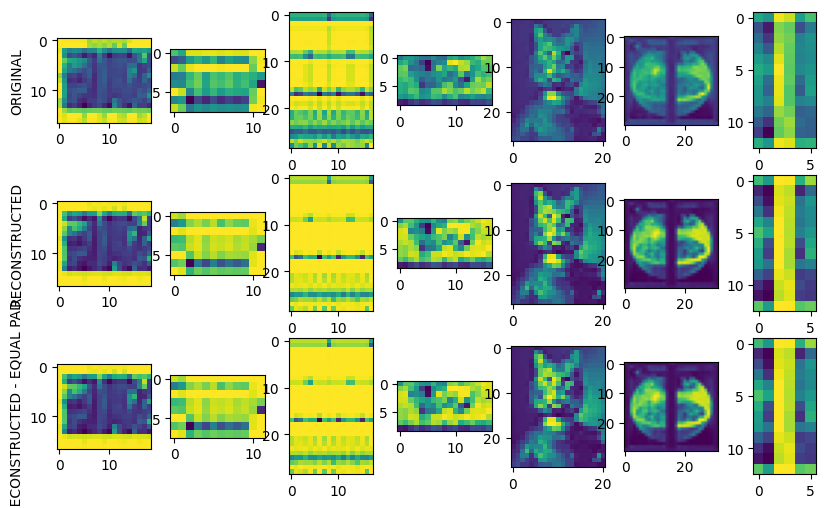

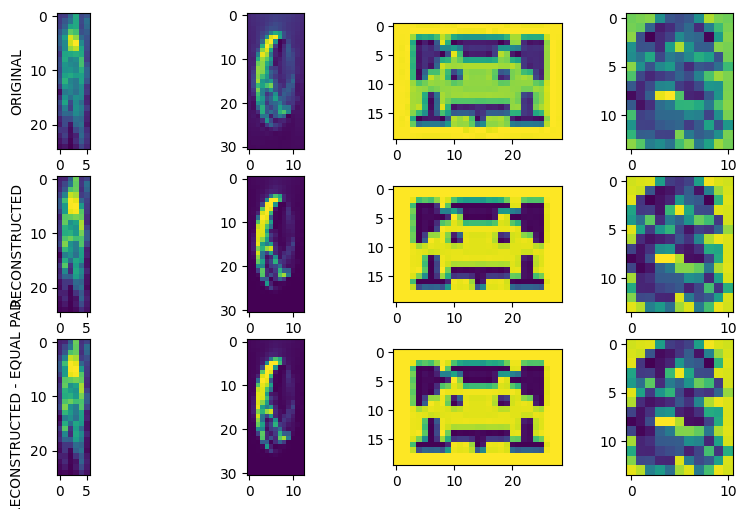

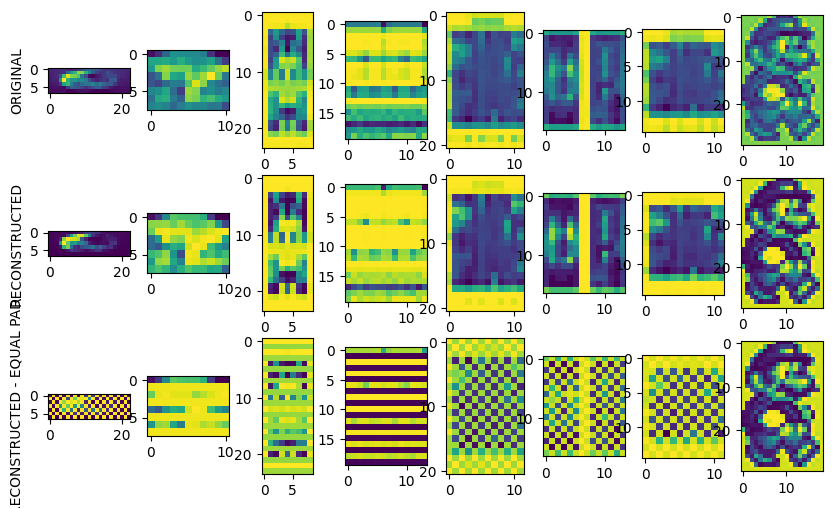

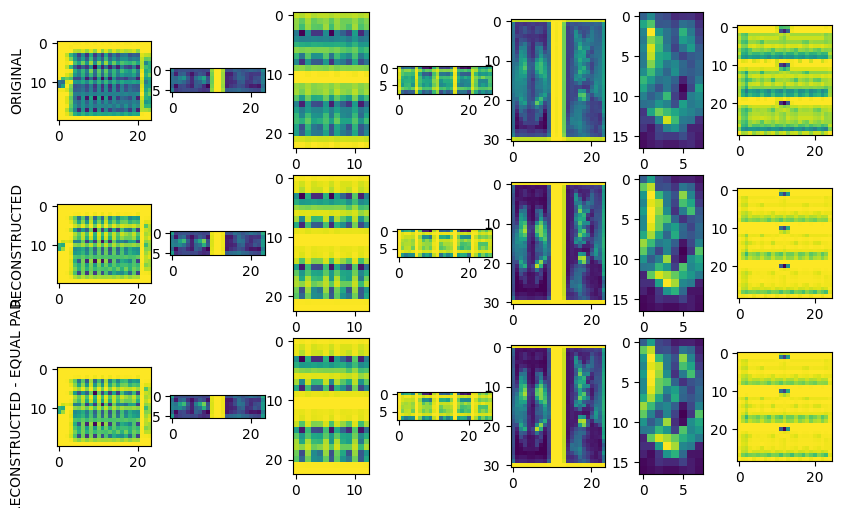

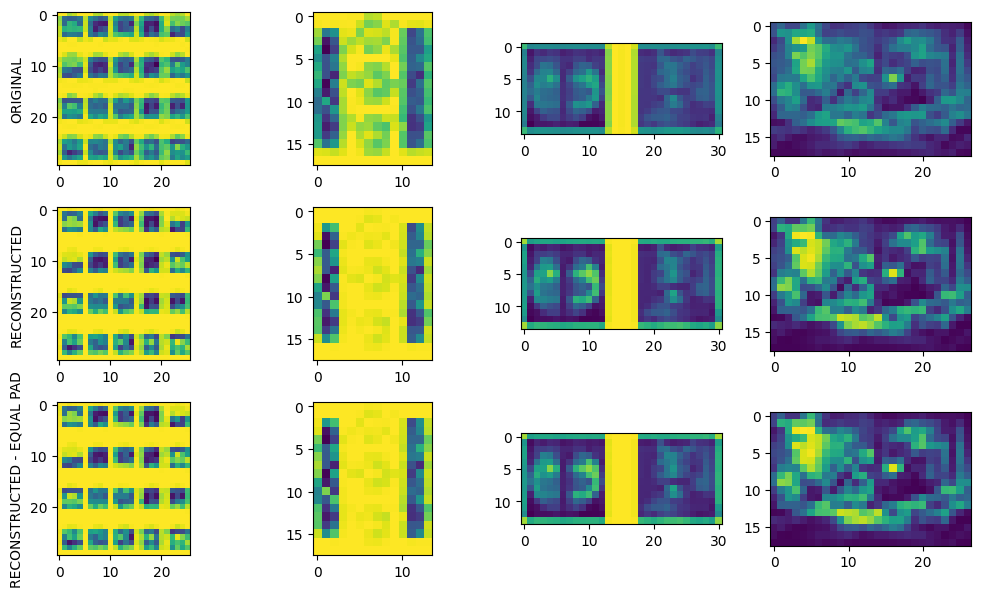

In [9]:
import os

# Change the default INT values to your liking, keep in mind not to overdo it
IMG_FOLDER_PATH = "figures"
ALL_IMAGE_PATHS = list(os.walk(IMG_FOLDER_PATH))[0][2]
NUM_OF_TESTS = 5
MAX_VALID_IMG_DIM = 32
MIN_VALID_IMG_DIM = 5
MAX_NUM_IMAGES_AT_ONCE = 8

for test_num in range(NUM_OF_TESTS):
    print(f"Test {test_num} starting")
    num_of_images = np.random.randint(2, MAX_NUM_IMAGES_AT_ONCE+1)
    fig, axs = plt.subplots(3, num_of_images, figsize=(10, 6))
    axs[0][0].set_ylabel("ORIGINAL")
    axs[1][0].set_ylabel("RECONSTRUCTED")
    axs[2][0].set_ylabel("RECONSTRUCTED - EQUAL PAD")
    
    img_shapes = []
    np_frame = []
    np_frame_equally_padded = []
    decoded_data = []

    # pre-generate the new shapes, so the maximum padding size can be known upfront
    new_shapes = np.array([(
        np.random.randint(MIN_VALID_IMG_DIM, MAX_VALID_IMG_DIM + 1),
        np.random.randint(MIN_VALID_IMG_DIM, MAX_VALID_IMG_DIM + 1)
        ) for _ in range(num_of_images)])
    max_pad_size = hlp.nextpow2(np.max(new_shapes[:,0] * new_shapes[:,1]))
    print(f"Images will be resized to the shapes {new_shapes.tolist()}")
    
    for image_num in range(num_of_images):
        # Randomly select and load the image, convert to grayscale
        img_path = os.path.join(IMG_FOLDER_PATH, np.random.choice(ALL_IMAGE_PATHS))
        img = Image.open(img_path)
        img = img.convert("L")

        # Select the randomly generated size of the image
        
        img = np.array(
            img.resize(new_shapes[image_num], Image.Resampling.LANCZOS),
            dtype=np.float32 # convert to float32 to avoid int overflow and correct colors
        )
        img_shapes.append(img.shape)
        axs[0][image_num].imshow(img)

        # Transpose and pad image, add it to the np_frame
        np_frame.append(hlp.pad_0(img.T))
        np_frame_equally_padded.append(hlp.pad_0(img.T, size_pow2=max_pad_size))
    
    # Build the new cFRQI circuit and run the job
    qc = cFRQI(np_frame, 0)
    job = backend.run(qc) 

    # Decode images
    sv = np.real(job.result().get_statevector())
    decoded = hlp.decodeParallelQPIXL(sv, qc, len(np_frame))
    for num_img, (datum, shape) in enumerate(zip(decoded, img_shapes)):
        reconstructed_img = hlp.reconstruct_img(datum, shape)
        decoded_data.append(reconstructed_img)
        axs[1][num_img].imshow(reconstructed_img)

    # Build the old cFRQI circuit with equal padded inputs, run the job
    qc_old_cfrqi = cFRQI_old(np_frame_equally_padded, 0)
    job = backend.run(qc_old_cfrqi)
    sv = np.real(job.result().get_statevector())
    decoded = hlp.decodeParallelQPIXL(sv, qc_old_cfrqi, len(np_frame))
    for num_img, (datum, shape) in enumerate(zip(decoded, img_shapes)):
        reconstructed_img = hlp.reconstruct_img(datum, shape)
        decoded_data.append(reconstructed_img)
        axs[2][num_img].imshow(reconstructed_img)

    print(f"SIZE OF QC: {qc.size()}")
    print(f"SIZE OF QC_OLD_CFRQI: {qc_old_cfrqi.size()}")
    print(f"SIZE DIFFERENCE {qc_old_cfrqi.size() - qc.size()}\n")
plt.tight_layout()